# Preparation

Peparation biasa dilakukan untuk mempersiapkan data sebelum masuk dalam tahap pemodelan. <br>
Berikut adalah tahapan yang akan dilalui pada data `Cluster S1.csv` (sebuah data yang di-generate secara random) sebelum tahap pemodelan :
1. Import Library
2. Read Dataset
3. Pencarian Model CLuster Terbaik
4. Prosws Clustering

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import cluster
from sklearn.metrics import silhouette_score


In [ ]:
#Proses pembacaan data dari Sumber
data = pd.read_csv('https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/cluster_s1.csv')
data.head()

,no,x,y
0,NaN,664159,550946
1,NaN,665845,557965
2,NaN,597173,575538
3,NaN,618600,551446
4,NaN,635690,608046


In [ ]:
data.describe()

,no,x,y
count,0.0,5000.000000,5000.000000
mean,NaN,514937.556600,494709.292800
std,NaN,244465.901926,235840.852969
min,NaN,19835.000000,51121.000000
25%,NaN,320352.500000,320107.750000
50%,NaN,505338.500000,526259.500000
75%,NaN,786228.750000,713713.500000
max,NaN,961951.000000,970756.000000


In [ ]:
data.sample(10)

,no,x,y
2392,NaN,573969,434110
180,NaN,690968,555952
4772,NaN,660459,860658
3456,NaN,113321,606322
1502,NaN,865113,161302
348,NaN,796609,319691
3049,NaN,380281,205779
4374,NaN,808555,600511
3123,NaN,339393,209145
3357,NaN,137516,556818


In [ ]:
#drop data yang tidak diperlukan perlu
data=data.drop('no', axis = 1)
data.head()

,x,y
0,664159,550946
1,665845,557965
2,597173,575538
3,618600,551446
4,635690,608046


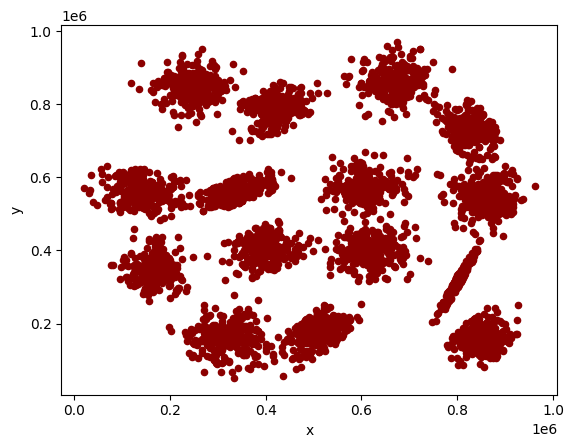

In [ ]:
#Lakukan Visualisasi
#Kita plot biar datanya terlihat

%matplotlib inline
ax1 = data.plot.scatter(x='x',y='y',c='DarkRed')

### Lakukan segmentasi data dengan metode Clustering, metode yang digunakan bebas. Hasil akhir akan dievaluasi menggunakan fungsi silhouette score seperti contoh di bawah ini

In [ ]:
#Lakukan Proses Pencarian CLuster terbaik untuk data diatas
from sklearn.cluster import KMeans
from sklearn import metrics
from warnings import filterwarnings as fw; fw("ignore")

#elbow method
#START CODE
inertia = []
for k in range(10, 25):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(data)
    inertia.append(model.inertia_)
inertia
#END CODE

[34391481278674.81,
 28911073060127.125,
 23146756787307.777,
 18350029727191.914,
 13486733767168.459,
 8917615616867.258,
 8654195380138.777,
 8415631292726.098,
 8227282809930.557,
 8000004005435.432,
 7782061513020.172,
 7672183139126.995,
 7519773294441.791,
 7189455085478.642,
 7006296067332.918]

In [ ]:
inertia_df = pd.DataFrame({'Inertia':inertia}, index=[i for i in range(10, 25)])
inertia_df

,Inertia
10,3.439148e+13
11,2.891107e+13
12,2.314676e+13
13,1.835003e+13
14,1.348673e+13
15,8.917616e+12
16,8.654195e+12
17,8.415631e+12
18,8.227283e+12
19,8.000004e+12


Text(0.5, 1.0, 'Elbow Method')

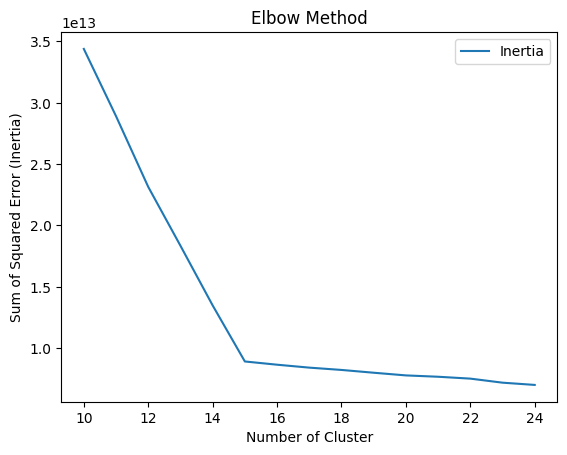

In [ ]:
inertia_df.plot(kind='line')
plt.ylabel('Sum of Squared Error (Inertia)')
plt.xlabel('Number of Cluster')
plt.title('Elbow Method')

In [ ]:
#Lengkapi Code di bawah ini sehingga menghasilkan evaluasi jumlah cluster terbaik
#Contoh pemanggilan Library CLustering
#from sklearn.cluster import KMeans

#START CODE
# Coba berbagai jumlah cluster
best_K = 15
kmeans = cluster.KMeans(n_clusters=best_K, random_state=42)
kmeans.fit(data)
label = kmeans.fit_predict(data)
#END CODE

score = silhouette_score(data, label)
print("silhouette score=",score)

silhouette score= 0.711278614093076


## Proses Visualisasi hasil CLuster

In [ ]:
#Proses Visualisasi hasil cluster

#Pertama, masukkan dahulu label hasil clustering ke dalam data

result = data.copy()

#START CODE
result['cluster'] = label
result.head()
#END CODE

,x,y,cluster
0,664159,550946,5
1,665845,557965,5
2,597173,575538,5
3,618600,551446,5
4,635690,608046,5


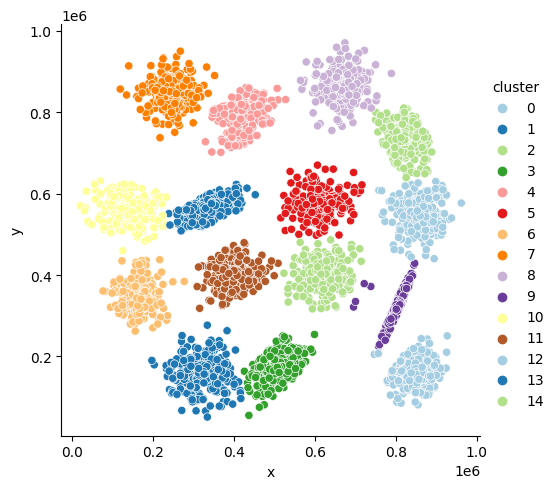

In [ ]:
#Lakukan Plotting terhadap data
import seaborn as sns

#Gunakan library seaborn, lebih mudah.
#plt.subplots(figsize=(10, 10))
#START CODE
sns.relplot(data=result, x='x', y='y', hue='cluster', palette= 'Paired')
#END CODE